### Deep Learning for Handwritten Digit Recognition using CNNs

In [24]:
# Separate the labels (target digits) from the pixel values in both datasets.
import pandas as pd
import numpy as np

# Load the datasets
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

# Separate the labels and pixel values
X_train = train.drop(columns=['label']).values
y_train = train['label'].values
X_test = test.drop(columns=['label']).values
y_test = test['label'].values


Normalize the Pixel Values: The pixel values range from 0 to 255. Normalize them to be between 0 and 1.

In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0


Reshape the Data: Reshape the flattened pixel values into 28x28 images (with 1 color channel, since they are grayscale).

In [26]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


One-Hot Encode the Labels: Convert the digit labels (0-9) into one-hot encoded vectors.

In [27]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


Build a CNN Model: Design a Convolutional Neural Network (CNN) to process the 28x28 images.

In [28]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ompile the Model: Choose an optimizer (e.g., Adam), a loss function (categorical crossentropy), and a performance metric (accuracy).

In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Train the Model: Train your model using the training data, experiment with hyperparameters like epochs and batch_size.

In [30]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.8666 - loss: 0.4445 - val_accuracy: 0.9825 - val_loss: 0.0580
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9817 - loss: 0.0578 - val_accuracy: 0.9840 - val_loss: 0.0544
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9883 - loss: 0.0382 - val_accuracy: 0.9887 - val_loss: 0.0366
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9914 - loss: 0.0287 - val_accuracy: 0.9907 - val_loss: 0.0329
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9925 - loss: 0.0223 - val_accuracy: 0.9877 - val_loss: 0.0418
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9938 - loss: 0.0178 - val_accuracy: 0.9910 - val_loss: 0.0339
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9954 - loss: 0.0139 - val_accuracy: 0.9912 - val_loss: 0.0350
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9962 - loss: 0.0111 - 

##### Key Insights:
Training Accuracy and Loss:

The model started with an accuracy of 86.59% and a loss of 0.4484 in the first epoch.
By the 10th epoch, the accuracy improved significantly to 99.66%, and the loss reduced to 0.0092, which indicates strong learning on the training data.
Validation Accuracy and Loss:

The validation accuracy started at 98.43% in the first epoch and peaked at 99.22% in the 7th epoch, then slightly decreased to 98.92% by the 10th epoch.
The validation loss started at 0.0551, reached a minimum of 0.0308 in the 7th epoch, and then slightly increased to 0.0443 by the 10th epoch.
Observations:
Overfitting: Around the 7th epoch, the validation loss starts increasing while the validation accuracy plateaus, which could be a sign of slight overfitting. The model is fitting well on the training data but not generalizing as perfectly on the validation set.

Implement Early Stopping and Learning Rate Scheduling
Why?

Early Stopping prevents overfitting by halting training when the model's performance on a validation set stops improving.
Learning Rate Scheduling adjusts the learning rate during training, which can lead to better convergence.

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define Learning Rate Scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Update your model.fit() to include callbacks
history = model.fit(
    X_train, y_train,
    epochs=50,  # Increased epochs
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9970 - loss: 0.0082 - val_accuracy: 0.9885 - val_loss: 0.0542 - learning_rate: 0.0010
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9980 - loss: 0.0062 - val_accuracy: 0.9923 - val_loss: 0.0347 - learning_rate: 0.0010
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9977 - loss: 0.0073 - val_accuracy: 0.9907 - val_loss: 0.0396 - learning_rate: 0.0010
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 21433s 25s/step - accuracy: 0.9984 - loss: 0.0045 - val_accuracy: 0.9903 - val_loss: 0.0461 - learning_rate: 0.0010
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9986 - loss: 0.0037 - val_accuracy: 0.9935 - val_loss: 0.0324 - learning_rate: 2.0000e-04
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 1.0000 - loss: 3.3345e-04 - val_accuracy: 0.9932 - val_loss: 0.0349 - learning_rate: 2.0000e-04
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accura

Explanation:

EarlyStopping monitors the validation loss and stops training if it doesn't improve for 3 consecutive epochs.
ReduceLROnPlateau reduces the learning rate by a factor of 0.2 if the validation loss doesn't improve for 2 consecutive epochs.

### Apply Regularization Techniques
Why?

Regularization helps in preventing overfitting, ensuring that the model generalizes well to unseen data.
How?

a. Dropout: Add dropout layers to randomly deactivate neurons during training, reducing over-reliance on specific neurons.

In [32]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Higher dropout in dense layer
    layers.Dense(10, activation='softmax')
])


L2 Regularization: Add L2 penalties to the weights to discourage large weights.

In [33]:
from tensorflow.keras import regularizers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


 Incorporate Data Augmentation
Why?

Data augmentation artificially increases the diversity of the training dataset, helping the model generalize better.
How?

In [34]:
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [38]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(X_val, y_val),  # Ensure X_val and y_val are defined
    steps_per_epoch=X_train.shape[0] // 64,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/50
  1/750 ━━━━━━━━━━━━━━━━━━━━ 58:41 5s/step - accuracy: 0.0938 - loss: 3.4426

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.7337 - loss: 1.1974 - val_accuracy: 0.9801 - val_loss: 0.3678 - learning_rate: 0.0010
Epoch 2/50


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9801 - val_loss: 0.3678 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9469 - loss: 0.4574 - val_accuracy: 0.9831 - val_loss: 0.2785 - learning_rate: 0.0010


In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,       # Rotate images by up to 10 degrees
    zoom_range=0.1,          # Zoom images by up to 10%
    width_shift_range=0.1,   # Shift images horizontally by up to 10%
    height_shift_range=0.1,  # Shift images vertically by up to 10%
    shear_range=0.1,         # Shear transformation
    horizontal_flip=False    # MNIST digits are not horizontally flipped
)

# Fit the generator to  training data
datagen.fit(X_train)

# Update model.fit() to use the generator
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(X_val, y_val),
    steps_per_epoch=X_train.shape[0] // 64,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9409 - loss: 0.4729 - val_accuracy: 0.9854 - val_loss: 0.2769 - learning_rate: 0.0010
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9854 - val_loss: 0.2769 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.9594 - loss: 0.3507 - val_accuracy: 0.9877 - val_loss: 0.2240 - learning_rate: 0.0010


ImageDataGenerator applies random transformations to the images during training, creating new, varied samples.

#### Hyperparameter Tuning
Why?

Hyperparameter tuning explores different combinations of hyperparameters to find the most optimal configuration for my model.
How?

a. Manual Tuning: Experiment with different batch sizes, learning rates, number of layers, etc.

b. Automated Tuning with Keras Tuner:

In [40]:
!pip install keras-tuner

import keras_tuner as kt
from tensorflow.keras import layers, models

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(
        filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(28, 28, 1)
    ))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(
        filters=hp.Int('filters_2', min_value=64, max_value=256, step=64),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Int('units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='mnist_tuning',
    project_name='mnist_digit_classification'
)

tuner.search(datagen.flow(X_train, y_train, batch_size=64), 
             epochs=50, 
             validation_data=(X_val, y_val),
             callbacks=[early_stop, reduce_lr])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of filters in the first Conv2D layer is {best_hps.get('filters_1')}.
The optimal number of filters in the second Conv2D layer is {best_hps.get('filters_2')}.
The optimal number of units in the Dense layer is {best_hps.get('units')}.
The optimal optimizer is {best_hps.get('optimizer')}.
""")


Trial 10 Complete [00h 03m 22s]
val_accuracy: 0.9859166741371155

Best val_accuracy So Far: 0.9925833344459534
Total elapsed time: 09h 37m 13s

The optimal number of filters in the first Conv2D layer is 128.
The optimal number of filters in the second Conv2D layer is 192.
The optimal number of units in the Dense layer is 256.
The optimal optimizer is adam.



Keras Tuner automates the hyperparameter search, testing different configurations to identify the best-performing model.


#### Cross-Validation for Robust Evaluation
Why?

Cross-validation provides a more reliable estimate of my  model's performance by training and validating it on multiple subsets of the data.

In [42]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    print(f'Training for fold {fold_no} ...')
    model = build_model(best_hps)  # Rebuild the model with best hyperparameters
    history = model.fit(
        datagen.flow(X_train_fold, y_train_fold, batch_size=64),
        epochs=50,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stop, reduce_lr]
    )
    fold_no += 1


Training for fold 1 ...
Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 69s 112ms/step - accuracy: 0.7303 - loss: 0.8022 - val_accuracy: 0.9810 - val_loss: 0.0570 - learning_rate: 0.0010
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 74s 123ms/step - accuracy: 0.9470 - loss: 0.1780 - val_accuracy: 0.9886 - val_loss: 0.0371 - learning_rate: 0.0010
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 75s 124ms/step - accuracy: 0.9613 - loss: 0.1288 - val_accuracy: 0.9858 - val_loss: 0.0429 - learning_rate: 0.0010
Training for fold 2 ...
Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 83s 136ms/step - accuracy: 0.7399 - loss: 0.7660 - val_accuracy: 0.9791 - val_loss: 0.0613 - learning_rate: 0.0010
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 78s 130ms/step - accuracy: 0.9454 - loss: 0.1794 - val_accuracy: 0.9861 - val_loss: 0.0487 - learning_rate: 0.0010
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 85s 141ms/step - accuracy: 0.9604 - loss: 0.1324 - val_accuracy: 0.9874 - val_loss: 0.0389 - learning_rate: 0.0010
Training for fold 3 ..

K-Fold Cross-Validation splits the data into k subsets, training the model k times each time using a different subset as the validation set.


#### Advanced Model Architectures
Why?

Exploring more sophisticated architectures can further boost the model's performance.
How?

a. Implementing Residual Networks (ResNet):

In [45]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Add

def residual_block(x, filters, kernel_size=3):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, kernel_size, activation=None, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = Add()([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

input_layer = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(input_layer)
x = layers.BatchNormalization()(x)
x = residual_block(x, 64)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = residual_block(x, 128)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(10, activation='softmax')(x)

resnet_model = models.Model(inputs=input_layer, outputs=output_layer)

resnet_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

resnet_model.summary()

# Train the ResNet model
history_resnet = resnet_model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr]
)


Model: "functional_60"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 28, 28,    │        640 │ input_layer_6[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 28, 28,    │        256 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 28, 28,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        256 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 28, 28,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        256 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 28, 28,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 14, 14,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 14, 14,    │          0 │ max_pooling2d_12… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 14, 14,    │     73,856 │ dropout_18[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        512 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 14, 14,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        512 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 14, 14,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        512 │ conv2d_17[0][0] 

 Total params: 2,055,306 (7.84 MB)

 Trainable params: 2,053,642 (7.83 MB)

 Non-trainable params: 1,664 (6.50 KB)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 378s 492ms/step - accuracy: 0.8378 - loss: 0.5341 - val_accuracy: 0.9846 - val_loss: 0.0497 - learning_rate: 0.0010
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 394s 525ms/step - accuracy: 0.9701 - loss: 0.0991 - val_accuracy: 0.9868 - val_loss: 0.0478 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 386s 514ms/step - accuracy: 0.9769 - loss: 0.0745 - val_accuracy: 0.9849 - val_loss: 0.0458 - learning_rate: 0.0010


### Evaluate with Comprehensive Metrics
Why?

Accuracy alone doesn't provide a complete picture. Additional metrics like confusion matrix, precision, recall, and F1-score offer deeper insights into model performance.
How?

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


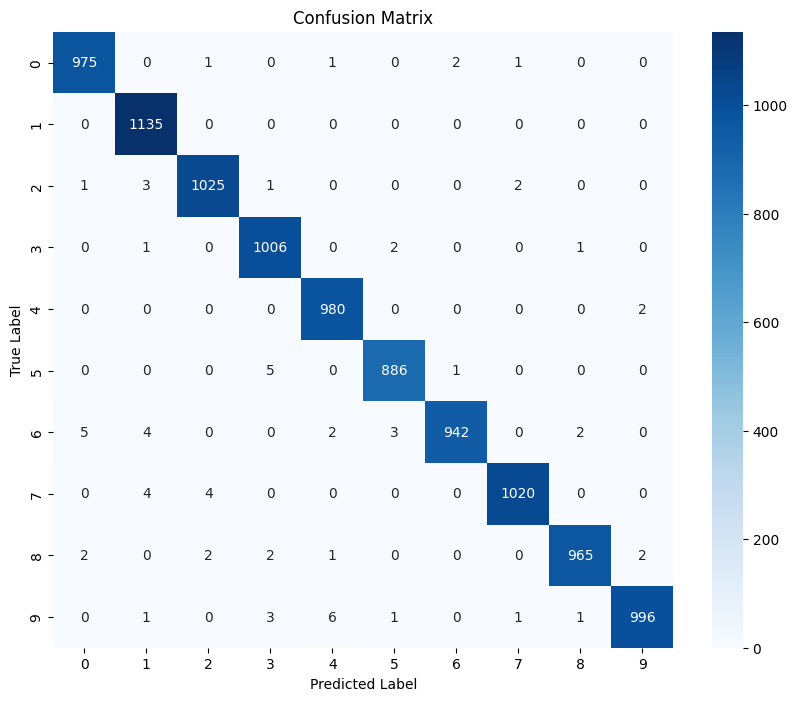

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       1.00      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [50]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(true_labels, y_pred_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print(classification_report(true_labels, y_pred_labels))


#### Deploy my Model:

Create a simple web application using Flask or Streamlit to demonstrate my model's capabilities.



In [52]:
!pip install streamlit

import streamlit as st
from PIL import Image
import numpy as np

st.title("Handwritten Digit Recognition")

uploaded_file = st.file_uploader("Choose an image...", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert('L')
    image = image.resize((28, 28))
    st.image(image, caption='Uploaded Image', use_column_width=True)
    img_array = np.array(image) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction, axis=1)[0]
    st.write(f'Predicted Digit: {predicted_label}')


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 2.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/8.7 MB 3.1 MB/s eta 0:00:03
   --------- ------------------------------ 2.1/8.7 MB 3.7 MB/s eta 0:00:02
   -------------- ------------------------- 3.1/8.7 MB 3.8 MB/s eta 0:00:02
   ------------------- -------------------- 4.2/8.7 MB 4.1 MB/s eta 0:00:02
   ----------------------- ---------------- 5.2/8.7 MB 4.4 MB/s eta 0:00:01
   ------------------------- -------------- 5.5/8.7 MB 4.4 MB/s eta 0:00:01
   ----------------------------- ---------- 6.6/8.7 MB 3.9 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.7 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 4.1 MB/s eta 0:00:00
   -----------------------

2024-09-18 03:56:23.156 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 03:56:23.404 
  command:

    streamlit run C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-18 03:56:23.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 03:56:23.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 03:56:23.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 03:56:23.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 03:56:23.404 Thread 'MainThread': missing ScriptRunContext! This wa

### Integrate TensorBoard:

TensorBoard to visualize training metrics, model graph

How?

In [51]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir='logs')

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr, tensorboard]
)


Epoch 1/50


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 92s 120ms/step - accuracy: 0.9513 - loss: 0.1684 - val_accuracy: 0.9934 - val_loss: 0.0257 - learning_rate: 0.0010
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 103s 137ms/step - accuracy: 0.9715 - loss: 0.0912 - val_accuracy: 0.9936 - val_loss: 0.0235 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 94s 125ms/step - accuracy: 0.9781 - loss: 0.0771 - val_accuracy: 0.9936 - val_loss: 0.0222 - learning_rate: 0.0010
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 94s 125ms/step - accuracy: 0.9792 - loss: 0.0682 - val_accuracy: 0.9944 - val_loss: 0.0212 - learning_rate: 0.0010
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 90s 120ms/step - accuracy: 0.9802 - loss: 0.0642 - val_accuracy: 0.9930 - val_loss: 0.0240 - learning_rate: 0.0010
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 88s 118ms/step - accuracy: 0.9807 - loss: 0.0639 - val_accuracy: 0.9929 - val_loss: 0.0251 - learning_rate: 0.0010
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 95s 126ms/step - accuracy: 0.9840 - loss